# Lecture 5
- Importance sampling and SIR
- Laplace Approx
- MCMC intro

last lecture: made predictions (probability) using monte carlo integration - converges slowly if prior and likelihood is not overlapping well

Importance sampling (not really sampling) is a better way to do this. Also Sampling Importance Resampling (SIR).

Approx a function (the posterior) uisng Laplace Approx

Intro to MCMC and Metropolis Hastings: Generate sample from posterior

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Importance Sampling

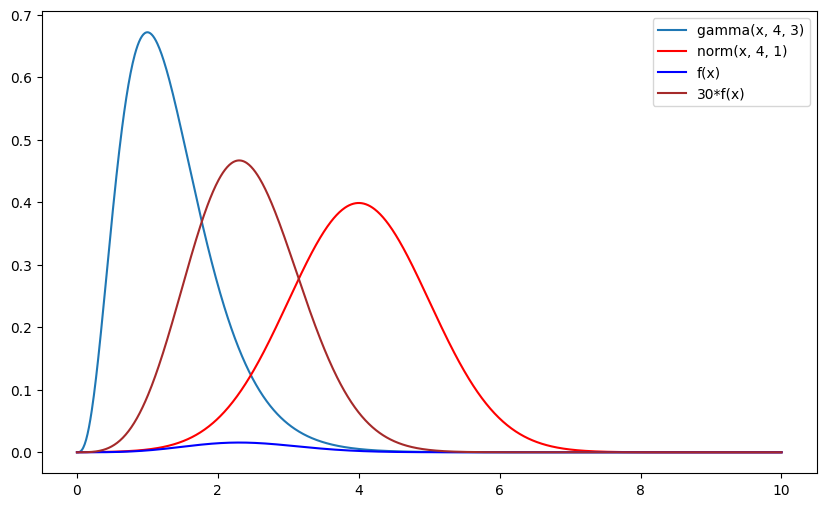

Naive MC integration estimate: 0.029042856816168867
Importance sampling estimate: 0.03064746970933305
MC int is much less stable than importance sampling


In [10]:
# Integrating the dgamma(x, 4, 3)*dnorm(x, 4, 1) from zero to infinity.

from scipy.stats import gamma, norm
x = np.linspace(0, 10, 1000)
f = gamma.pdf(x, 4, scale=1/3) * norm.pdf(x, 4, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, gamma.pdf(x, 4, scale=1/3), label='gamma(x, 4, 3)') #this is the function we want to find the expectation of conditinal on the norm??
plt.plot(x, norm.pdf(x, 4, 1), color='red', label='norm(x, 4, 1)') #density
plt.plot(x, f, color='blue', label='f(x)') #very small
plt.plot(x, 30*f, color='brown', label='30*f(x)')
plt.legend()
plt.show()

# Naive MC integration
samp = norm.rvs(4, 1, size=1000)
print('Naive MC integration estimate:', np.mean(gamma.pdf(samp, 4, scale=1/3)))

# Importance sampling
samp = norm.rvs(2.5, 0.8, size=1000)
weights = gamma.pdf(samp, 4, scale=1/3) * norm.pdf(samp, 4, 1) / norm.pdf(samp, 2.5, 0.8) #multply old dens and divide by new
print('Importance sampling estimate:', np.mean(weights))

print(' MC int is much less stable than importance sampling')